In [1]:
from datascience import *
import matplotlib
path_data = '../assets/data/'
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# 15.0 Prediction (예측)

In [2]:
# Data on heights of parents and their adult children
original = Table.read_table(path_data + 'family_heights.csv')
heights = Table().with_columns(
    'MidParent', original.column('midparentHeight'),
    'Child', original.column('childHeight')
    )

In [3]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


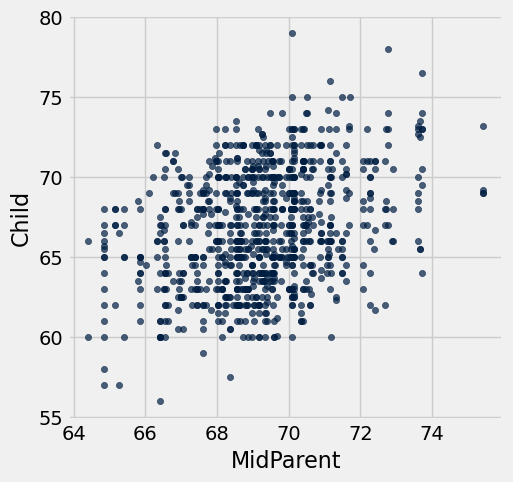

In [6]:
heights.scatter('MidParent')
plots.show()

In [7]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()                       

우리의 접근 방식은 새로운 사람의 중간 부모 키가 중간 부모 키 정도인 모든 지점을 기반으로 예측을 하는 것이었습니다. 이를 위해 중간 부모 키를 인수로 삼고 인수에서 0.5인치 이내에 중간 부모 키를 가진 모든 자녀의 평균 키를 반환하는 'predict_child'라는 함수를 작성했습니다.

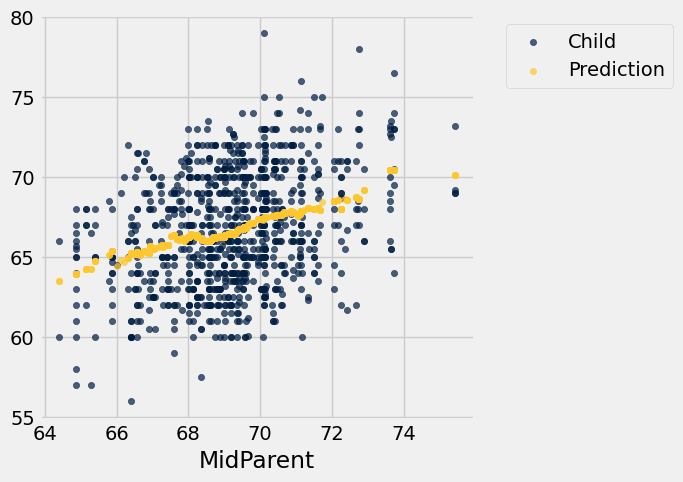

In [8]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

# Draw the original scatter plot along with the predicted values

heights_with_predictions.scatter('MidParent')
plots.show()

다음과 같은 방식을 회귀라고 한다.

# 15.1 Correlation (상관관계)

In [25]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.show()

In [11]:
hybrid = Table.read_table(path_data + 'hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


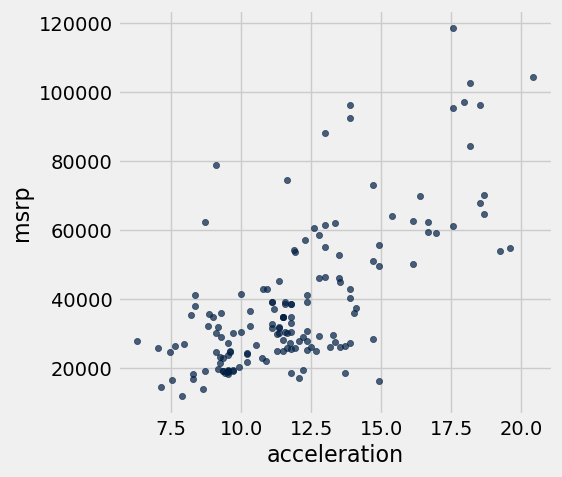

In [14]:
hybrid.scatter('acceleration', 'msrp')
plots.show()

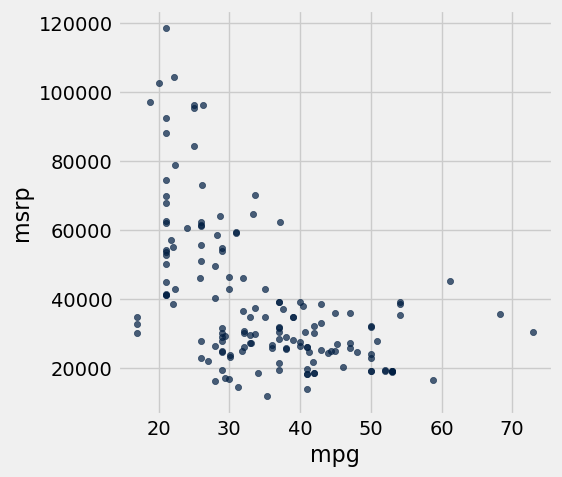

In [17]:
hybrid.scatter('mpg', 'msrp')
plots.show()

acceleration과 msrp는 양의 상관관계를 보인다. 한쪽이 증가하면 나머지 한쪽이 증가하는 형태를 띈다. mpg와 msrp는 음의 상관관계를 보인다.

In [18]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

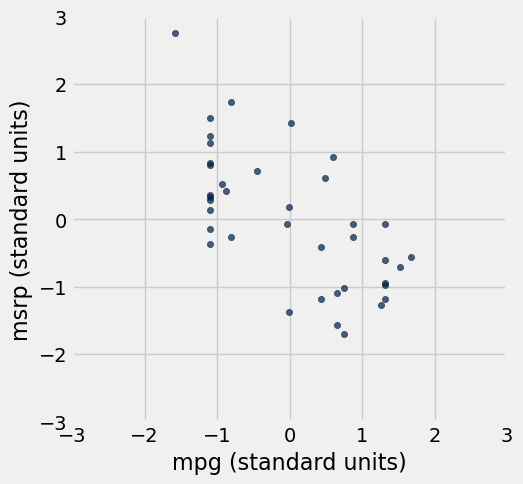

In [20]:
suv = hybrid.where('class', 'SUV')
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3)
plots.show()

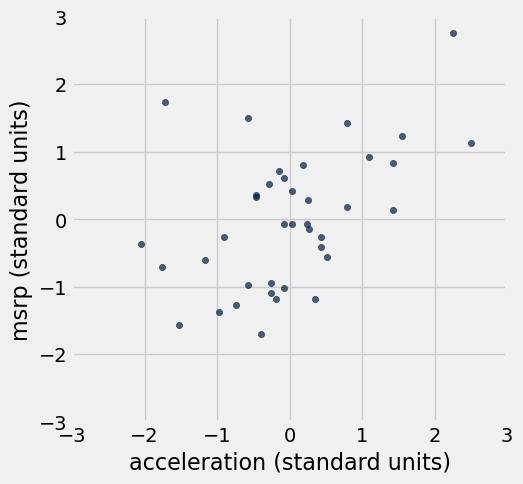

In [21]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3)
plots.show()

### 상관 계수

- -1 <= r <= 1의 값을 가지는 숫자.
- r는 산점도가 직선 주위에 모여있는 정도를 측정.

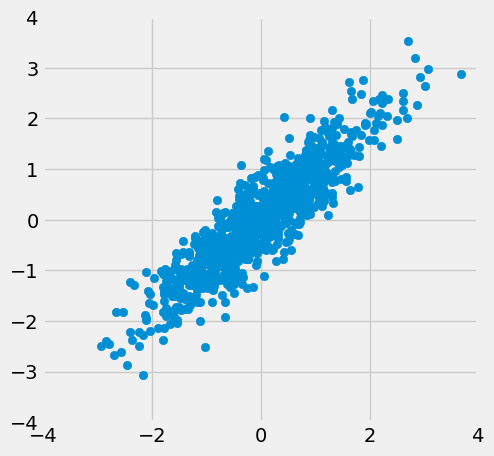

In [26]:
r_scatter(0.9)

### r 계산하기

r은 두 변수를 표준 단위로 측정할 때 두 변수의 곱의 평균이다.

In [27]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


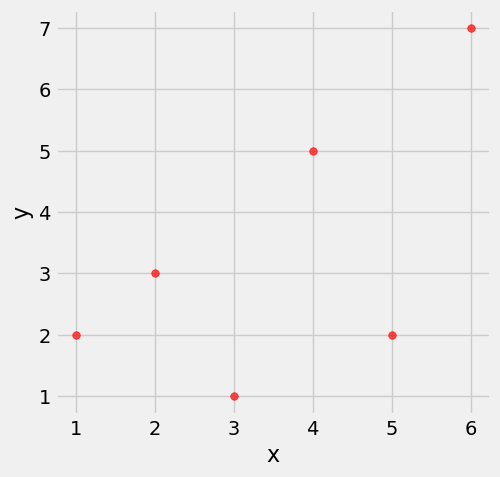

In [31]:
t.scatter(0, 1, s=30, color='red')
plots.show()

In [32]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [33]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [34]:
# r is the average of the products of standard units

r = np.mean(t_product.column(4))
r

0.61741639718977093

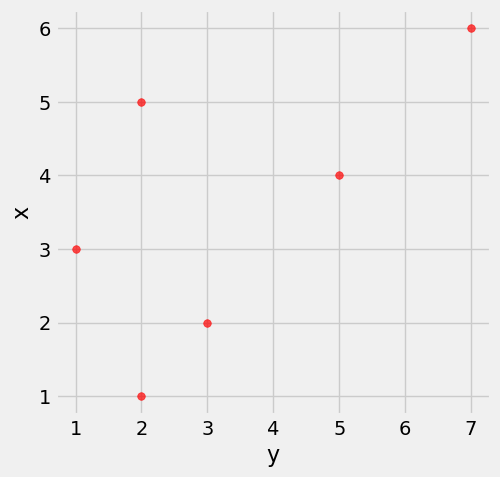

In [37]:
t.scatter('y', 'x', s=30, color='red')
plots.show()

## '상관' 함수
상관관계를 반복적으로 계산할 예정이므로 위에서 설명한 모든 단계를 수행하여 계산하는 함수를 정의하는 데 도움이 될 것입니다. 표와 표에 있는 두 열의 레이블을 사용하는 함수 '상관관계'를 정의해 보겠습니다. 함수는 해당 열의 값을 표준 단위로 곱한 평균인 $r$을 반환합니다.

In [38]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [39]:
correlation(t, 'x', 'y')

0.61741639718977093

In [40]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [41]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

이 값들은 우리가 관찰한 것을 확인시켜 줍니다:

- 가격과 효율성 사이에는 부정적인 연관성이 있는 반면, 가격과 가속도 사이에는 긍정적인 연관성이 있습니다.
- 가격과 가속도 사이의 선형 관계는 가격과 주행 거리 사이의 관계보다 약간 약합니다(약 0.5의 상관관계).

상관관계는 간단하고 강력한 개념이지만 때때로 잘못 사용되기도 합니다. $r$을 사용하기 전에 상관관계가 무엇을 하고 측정하지 않는지 파악하는 것이 중요합니다.

## 연관성은 인과관계가 아니다

상관관계는 연관성만 측정합니다. 상관관계가 인과관계를 의미하지는 않습니다. 학군 내 어린이의 체중과 수학 능력 사이의 상관관계는 양수일 수 있지만, 그렇다고 해서 수학을 하면 어린이가 더 무거워지거나 체중이 증가한다고 해서 어린이의 수학 능력이 향상되는 것은 아닙니다. 연령은 혼란스러운 변수입니다: 나이가 많은 어린이는 평균적으로 어린 어린이보다 더 무겁고 수학을 더 잘합니다.

## 상관관계 측정 *선형* 연관성
상관관계는 선형이라는 한 가지 종류의 연관성만 측정합니다. 비선형 연관성이 강한 변수는 상관관계가 매우 낮을 수 있습니다. 다음은 완벽한 이차 관계 $y = x^2$를 가지지만 상관관계가 0인 변수의 예입니다.

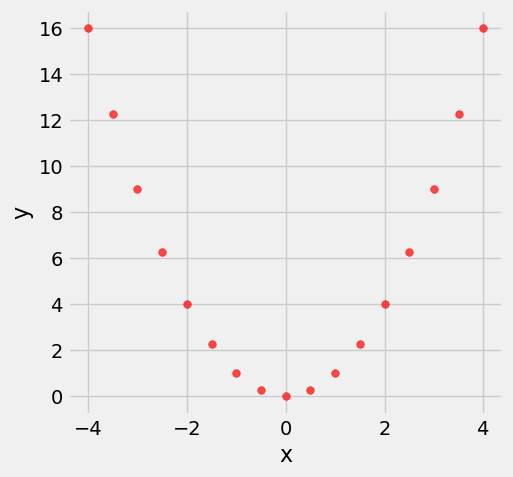

In [44]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')
plots.show()

In [45]:
correlation(nonlinear, 'x', 'y')

0.0

## 상관관계는 이상치의 영향을 받습니다
이상값은 상관관계에 큰 영향을 미칠 수 있습니다. 다음은 $r$이 1인 산점도를 하나의 외곽 지점만 추가하여 $r$이 0인 산점도로 변환한 예입니다.

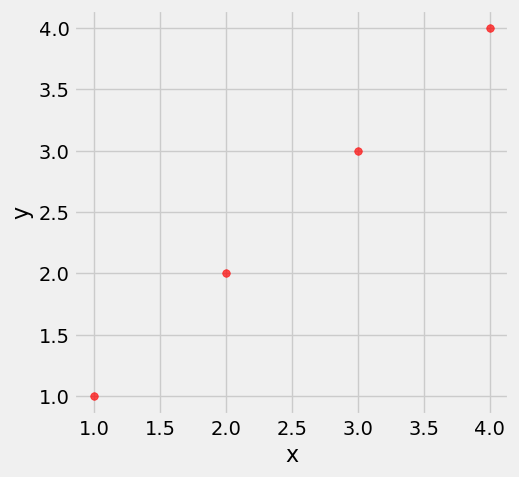

In [46]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')
plots.show()

In [47]:
correlation(line, 'x', 'y')

1.0

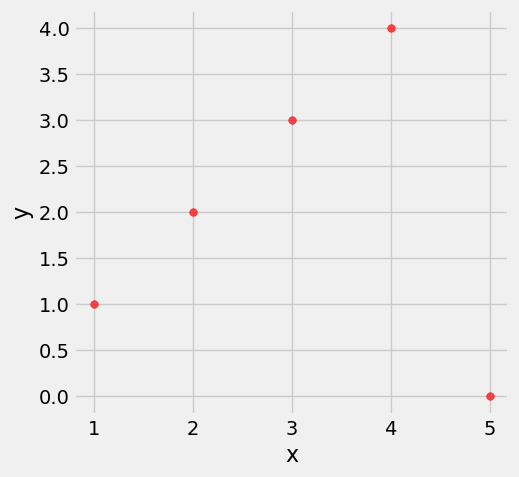

In [48]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')
plots.show()

In [49]:
correlation(outlier, 'x', 'y')

0.0

### 생태적 상관관계

In [50]:
sat2014 = Table.read_table(path_data + 'sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


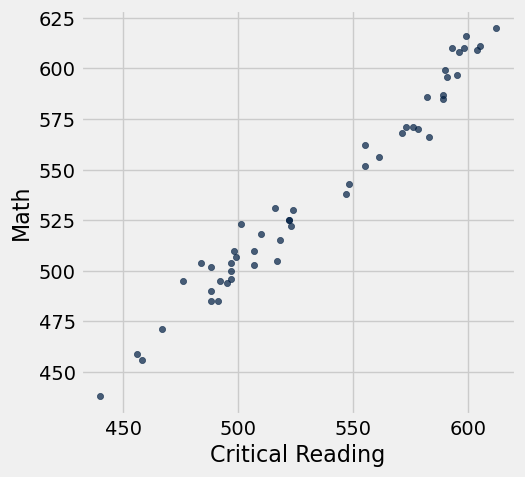

In [51]:
sat2014.scatter('Critical Reading', 'Math')
plots.show()

In [52]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341

# 15.2 Regression Line (회귀 선)

In [53]:
original = Table.read_table(path_data + 'family_heights.csv')

heights = Table().with_columns(
    'MidParent', original.column('midparentHeight'),
    'Child', original.column('childHeight')
    )

In [54]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()   

In [55]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

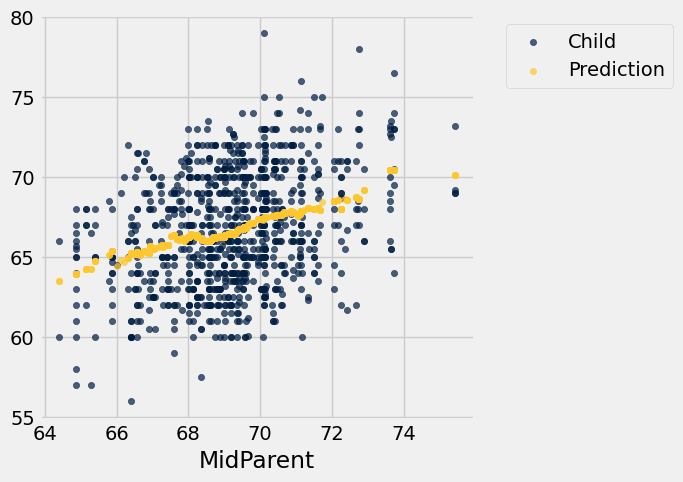

In [56]:
heights_with_predictions.scatter('MidParent')
plots.show()

## 표준 단위로 측정

이 선을 식별할 수 있는 방법을 찾을 수 있는지 알아봅시다. 먼저 선형 연관성은 측정 단위에 의존하지 않으므로 표준 단위로 두 변수를 모두 측정하는 것이 좋습니다.

In [57]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

In [58]:
heights_SU = Table().with_columns(
    'MidParent SU', standard_units(heights.column('MidParent')),
    'Child SU', standard_units(heights.column('Child'))
)
heights_SU

MidParent SU,Child SU
3.45465,1.80416
3.45465,0.686005
3.45465,0.630097
3.45465,0.630097
2.47209,1.88802
2.47209,1.60848
2.47209,-0.348285
2.47209,-0.348285
1.58389,1.18917
1.58389,0.350559


In [59]:
sd_midparent = np.std(heights.column(0))
sd_midparent

1.8014050969207571

In [60]:
0.5/sd_midparent

0.27756111096536701

In [61]:
def predict_child_su(mpht_su):
    """Return a prediction of the height (in standard units) of a child 
    whose parents have a midparent height of mpht_su in standard units.
    """
    close = 0.5/sd_midparent
    close_points = heights_SU.where('MidParent SU', are.between(mpht_su-close, mpht_su + close))
    return close_points.column('Child SU').mean()   

In [62]:
heights_with_su_predictions = heights_SU.with_column(
    'Prediction SU', heights_SU.apply(predict_child_su, 'MidParent SU')
    )

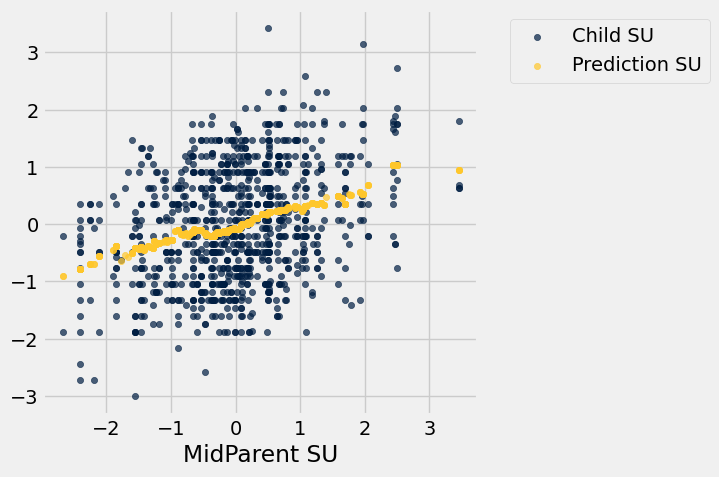

In [63]:
heights_with_su_predictions.scatter('MidParent SU')
plots.show()

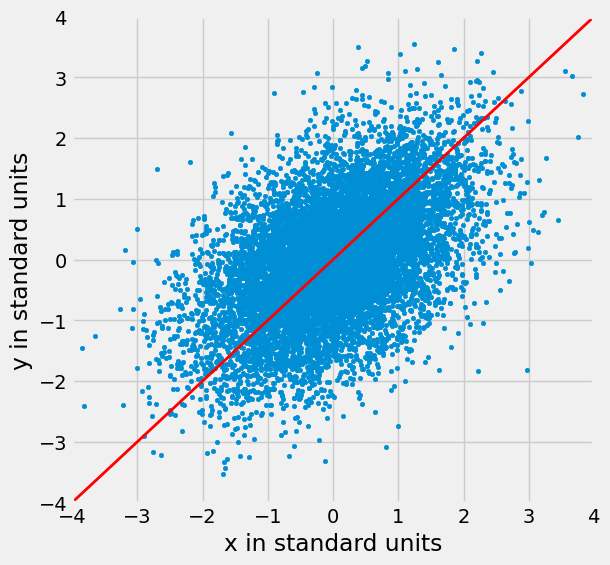

In [64]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plots.figure(figsize=(6,6))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
#plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plots.plot([-4,4],[-4,4], color='r', lw=2)
#plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units')
plots.show()

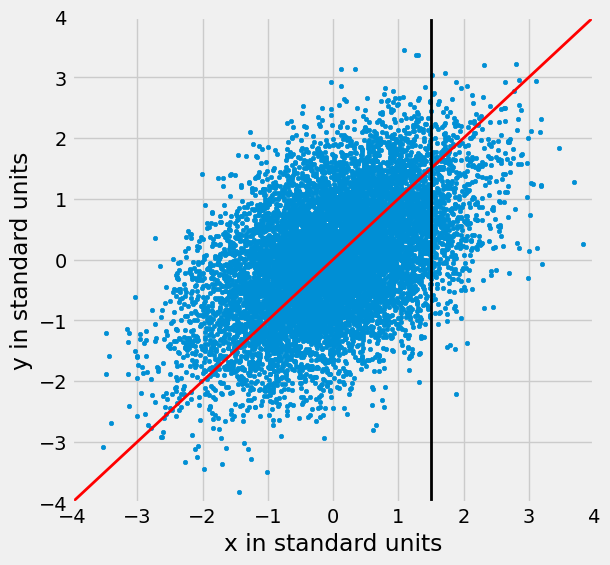

In [65]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plots.figure(figsize=(6,6))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
#plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plots.plot([-4,4],[-4,4], color='r', lw=2)
plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units')
plots.show()

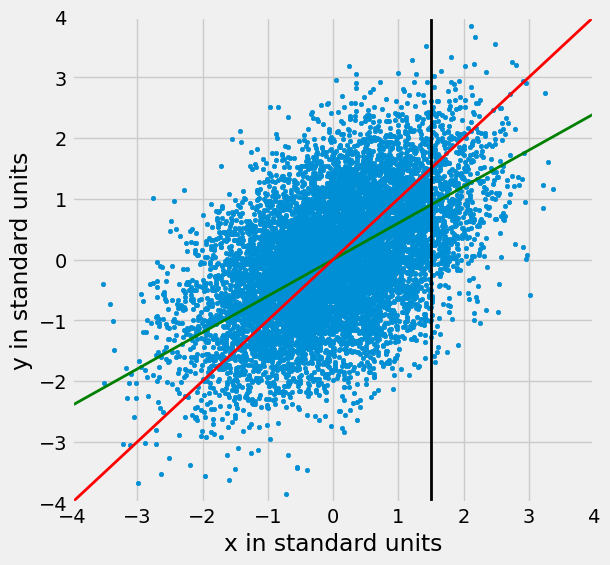

In [66]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plots.figure(figsize=(6,6))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plots.plot([-4,4],[-4,4], color='r', lw=2)
plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units')
plots.show()